# Mount and import

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2,f_regression
call1 = pd.read_csv('/content/drive/MyDrive/Dataset/call_center/case_data_calls.csv')
call2 = pd.read_csv('/content/drive/MyDrive/Dataset/call_center/case_data_reservations.csv')

#Linear Regression model (Skip this)

In [126]:
a = call1['date;calls;weekday'].str.split(';', expand=True)
a.columns = ['date', 'calls', 'weekday']
b = call2['date;reservations_2months_advance;total_reservations;summer_break;christmas_break;special_day'].str.split(';', expand=True)
b.columns = ['date','reservations_2months_advance','total_reservations','summer_break','christmas_break','special_day']

df = a.merge(b, on='date', how='inner')
df.shape

(790, 8)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790 entries, 0 to 789
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   date                          790 non-null    object
 1   calls                         790 non-null    object
 2   weekday                       790 non-null    object
 3   reservations_2months_advance  790 non-null    object
 4   total_reservations            790 non-null    object
 5   summer_break                  790 non-null    object
 6   christmas_break               790 non-null    object
 7   special_day                   790 non-null    object
dtypes: object(8)
memory usage: 55.5+ KB


In [128]:
df['date'] = pd.to_datetime(df['date'])
df[['reservations_2months_advance',
    'total_reservations',
    'calls',
    'weekday',
    'summer_break',
    'christmas_break',
    'special_day']] = df[['reservations_2months_advance', 'total_reservations',
                           'calls',
                           'weekday',
                           'summer_break',
                           'christmas_break',
                           'special_day']].apply(pd.to_numeric)

In [129]:
df.describe()

,calls,weekday,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
count,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000
mean,4733.030380,4.002532,4558.364557,27689.987342,0.155696,0.035443,0.039241
std,2131.641784,2.001265,2339.046454,12657.335897,0.362797,0.185014,0.194290
min,1059.000000,1.000000,965.000000,6507.000000,0.000000,0.000000,0.000000
25%,3178.250000,2.000000,2914.250000,18434.250000,0.000000,0.000000,0.000000
50%,4397.000000,4.000000,4034.500000,25819.000000,0.000000,0.000000,0.000000
75%,5868.000000,6.000000,5661.750000,34496.750000,0.000000,0.000000,0.000000
max,12864.000000,7.000000,17681.000000,79727.000000,1.000000,1.000000,1.000000


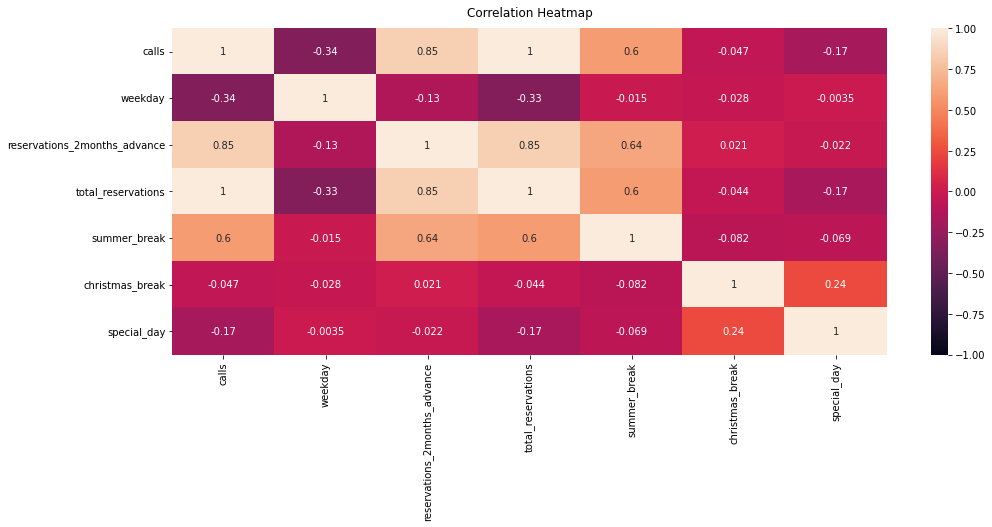

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [131]:
df['date'] = pd.to_datetime(df.date,format='%d-%m-%Y') 
#Extract year month day
df['year']=df.date.dt.year 
df['month']=df.date.dt.month 
df['day']=df.date.dt.day
#set new index and inplace
df.set_index('date', drop=True, inplace=True)
df

,calls,weekday,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day,year,month,day
date,,,,,,,,,,
2014-01-01,1327,3,1494,7794,0,1,1,2014,1,1
2014-02-01,3417,4,2891,20074,0,1,0,2014,2,1
2014-03-01,3178,5,2790,17905,0,1,0,2014,3,1
2014-04-01,1767,6,2504,10880,0,0,0,2014,4,1
2014-05-01,1374,7,1522,8333,0,0,0,2014,5,1
...,...,...,...,...,...,...,...,...,...,...
2016-02-25,5690,4,4713,33309,0,0,0,2016,2,25
2016-02-26,5799,5,5204,34350,0,0,0,2016,2,26
2016-02-27,3949,6,5135,23656,0,0,0,2016,2,27


### Run again from here to exclude redundant data (after mutual info)

In [132]:
#df = df.drop(['christmas_break'], axis = 1)
df = df.drop(['total_reservations'], axis = 1)

In [133]:
X=np.array(df.drop(labels = ['calls'], axis = 1))
y=np.array(df['calls'])
X_train,X_test,y_train, y_test = train_test_split(df.drop(labels = ['calls'], axis =1),df['calls'],
                                                  test_size = 0.2, 
                                                  random_state = 1)


In [134]:
X_train

,weekday,reservations_2months_advance,summer_break,christmas_break,special_day,year,month,day
date,,,,,,,,
2015-01-07,3,6173,1,0,0,2015,1,7
2016-11-01,1,4171,0,0,0,2016,11,1
2015-12-26,6,5578,0,1,1,2015,12,26
2015-04-20,1,4472,0,0,0,2015,4,20
2014-10-13,1,2763,0,0,0,2014,10,13
...,...,...,...,...,...,...,...,...
2015-12-17,4,3981,0,0,0,2015,12,17
2016-07-02,7,3750,0,0,0,2016,7,2
2014-03-14,5,2915,0,0,0,2014,3,14


In [135]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

reservations_2months_advance    0.488939
summer_break                    0.188693
weekday                         0.154424
year                            0.143018
day                             0.068426
month                           0.053572
special_day                     0.026124
christmas_break                 0.000000
dtype: float64

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
model = LinearRegression().fit(X_train, y_train)
y_pred= model.predict(X_test)

In [138]:
#Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import explained_variance_score, r2_score

print(f'MSE is {mean_squared_error(y_test, y_pred)}')
print(f'RMSE is {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE is {mean_absolute_error(y_test, y_pred)}')
print(f'Overall accuracy is {explained_variance_score(y_test, y_pred)*100}%')

MSE is 763586.03824676
RMSE is 873.8341022452488
MAE is 665.8120594909209
Overall accuracy is 84.54994833903065%


#ARIMA(p,d,q)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,6

In [6]:
df = call1['date;calls;weekday'].str.split(';', expand=True)
df.columns = ['date', 'calls', 'weekday']
df.head()
df['date'] = pd.to_datetime(df.date,format='%d-%m-%Y') 

df.set_index('date', drop=True, inplace=True)
df=df.drop(['weekday'], axis = 1)
from datetime import datetime
df.head()

,calls
date,
2013-01-01,2429
2013-01-02,3881
2013-01-03,3560
2013-01-04,3155
2013-01-05,1538


In [7]:
df[['calls']] = df[['calls']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1155 entries, 2013-01-01 to 2016-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   calls   1155 non-null   int64
dtypes: int64(1)
memory usage: 18.0 KB


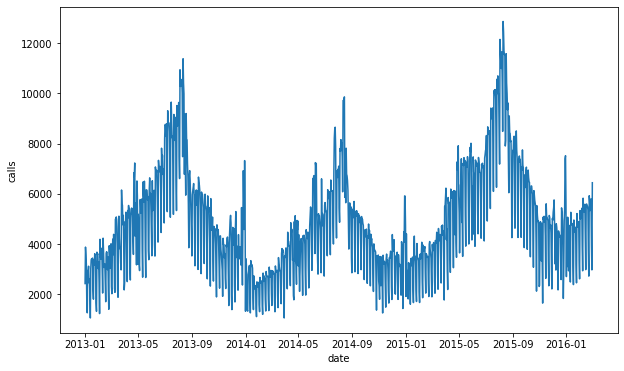

In [8]:
#plot
plt.xlabel('date')
plt.ylabel('calls')
plt.plot(df)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


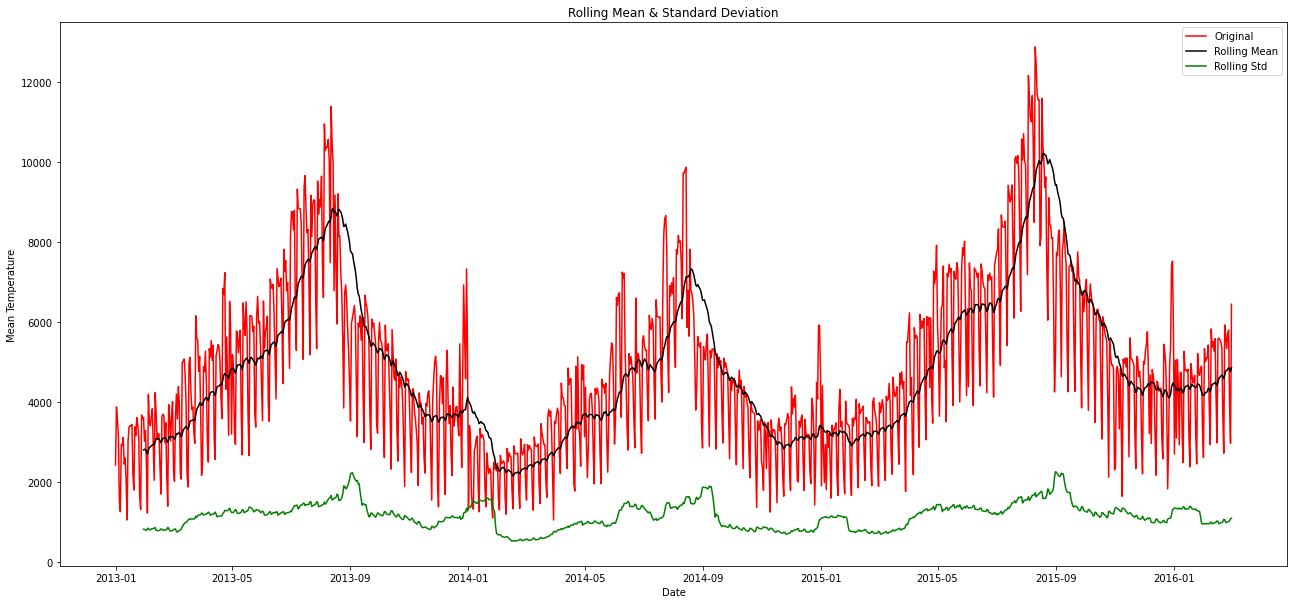

Test statistic:  -2.4592291604924204
p-value:  0.12571199317148152
Critical Values: {'1%': -3.436134799128575, '5%': -2.8640943408409716, '10%': -2.568129999345636}


In [9]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(df):
    # Dickey-Fuller test
    result = adfuller(df, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(df):
    #Rolling statistics
    rolmean = df.rolling(window = 30).mean()
    rolstd = df.rolling(window = 30).std() #assume we need to estimate the working hr for next month
    plt.figure(figsize=(22,10))   
    orig = plt.plot(df, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(df)
check_adfuller(df.calls)

The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values.

*   Mean is no stationary
*   Std is stationary

***df is non-stationary

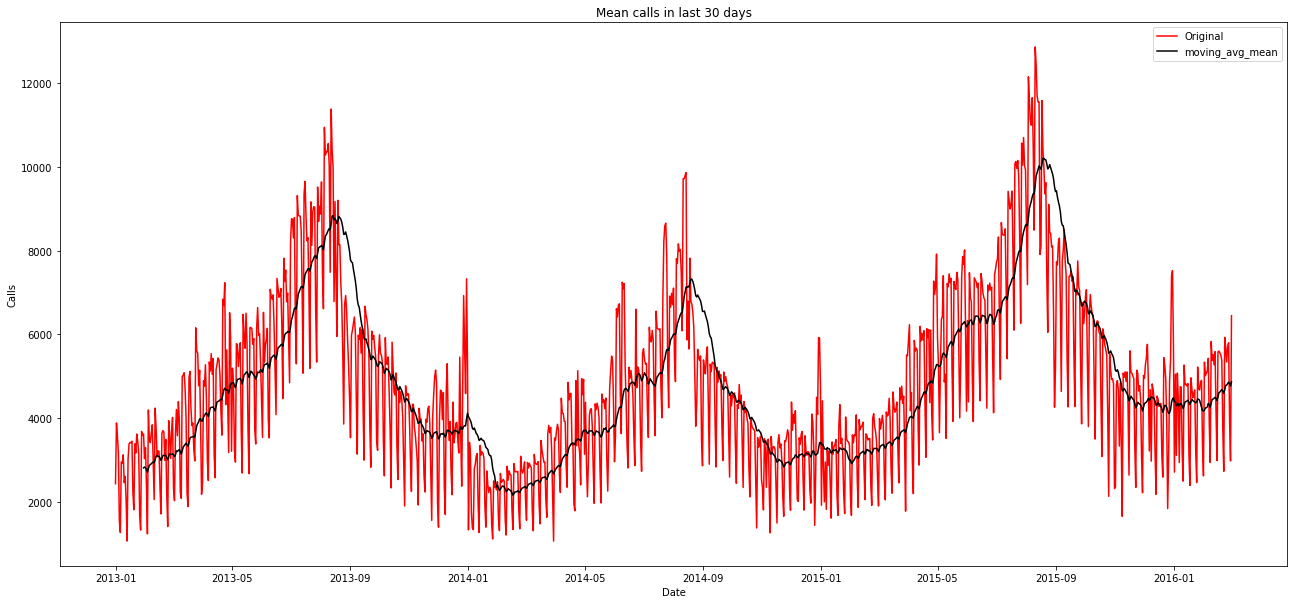

In [10]:
#to solve trend(constant mean)
# Moving average method
moving_avg = df.rolling(window = 30).mean()
plt.figure(figsize=(22,10))
plt.plot(df, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean calls in last 30 days")
plt.xlabel("Date")
plt.ylabel("Calls")
plt.legend()
plt.show()

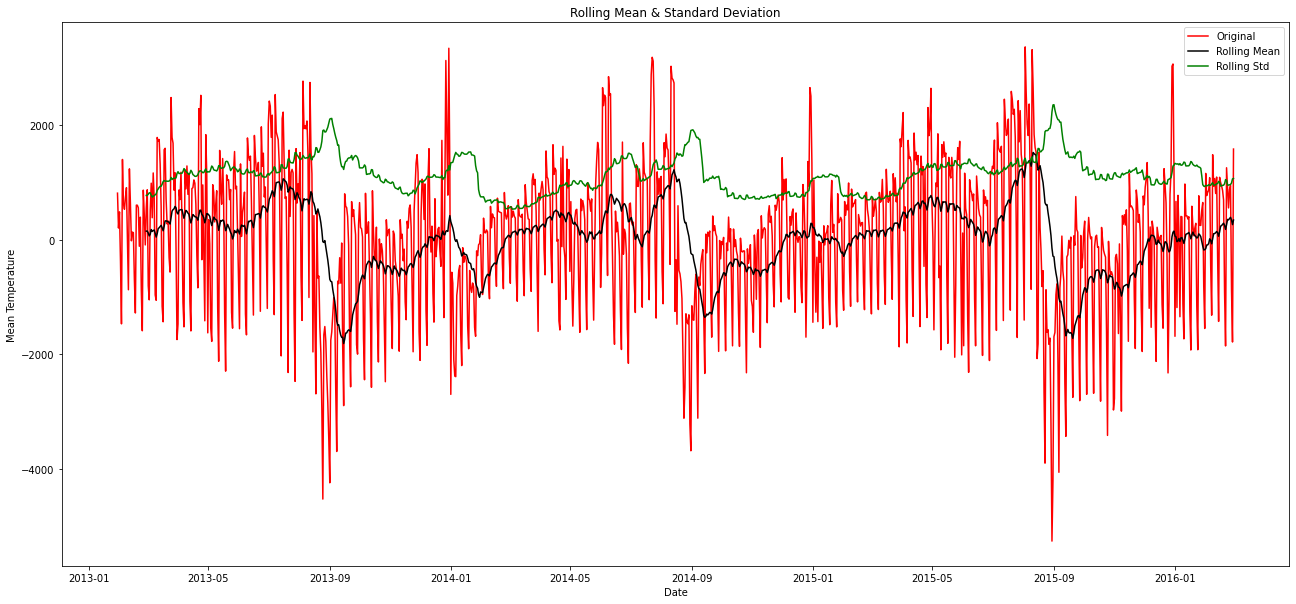

Test statistic:  -5.348126852947749
p-value:  4.349176768837317e-06
Critical Values: {'1%': -3.436287110400734, '5%': -2.864161528982321, '10%': -2.5681657829565743}


In [11]:
#Remove moving avg
df_moving_avg_diff = df - moving_avg
df_moving_avg_diff.dropna(inplace=True)
# check stationary: mean, variance(std)and adfuller test
check_mean_std(df_moving_avg_diff)
check_adfuller(df_moving_avg_diff.calls)

The test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series now

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


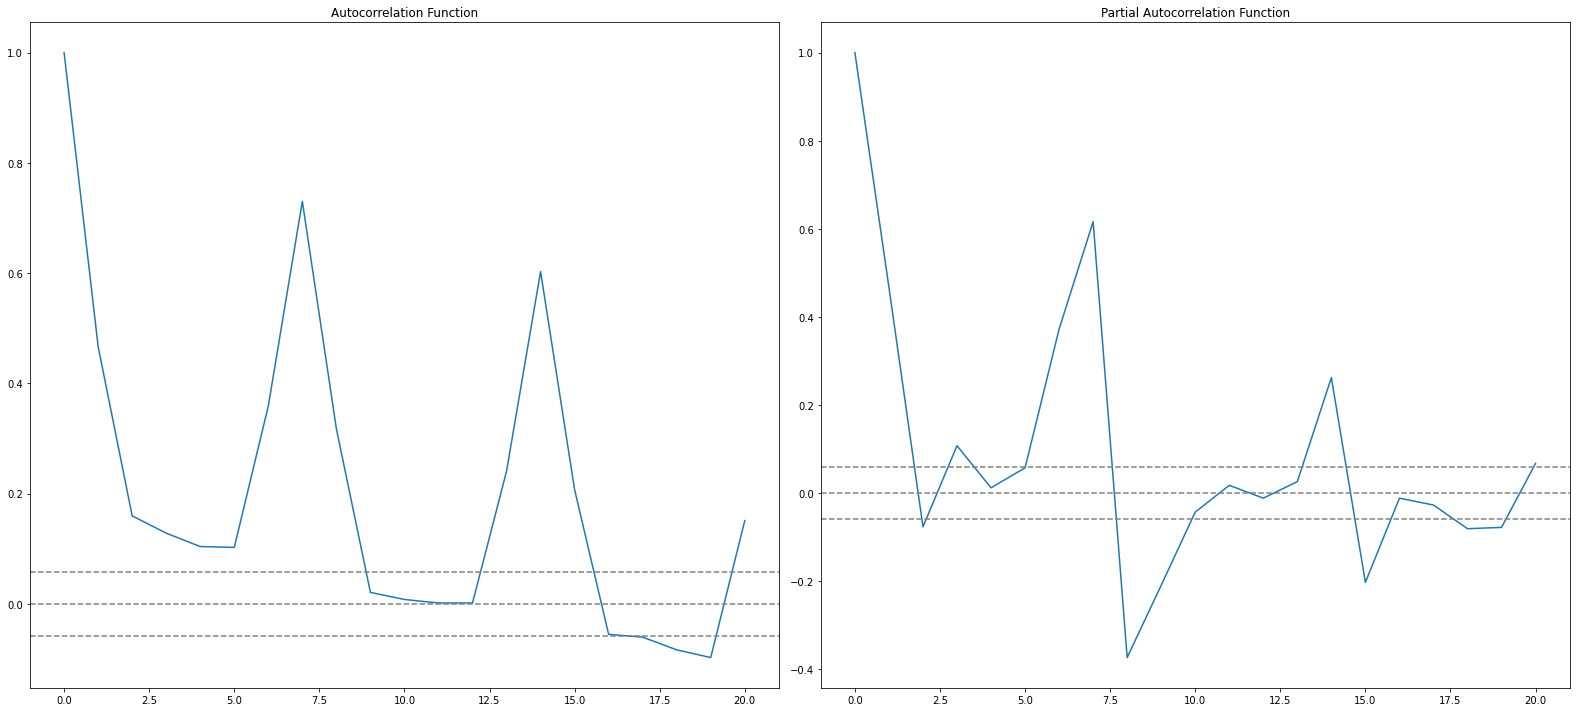

In [12]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_moving_avg_diff, nlags=20)
lag_pacf = pacf(df_moving_avg_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Choose q and p based on ACF and PACF chart where the lag value crosses the upper confidence interval for the first time.

***p = 9, q = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


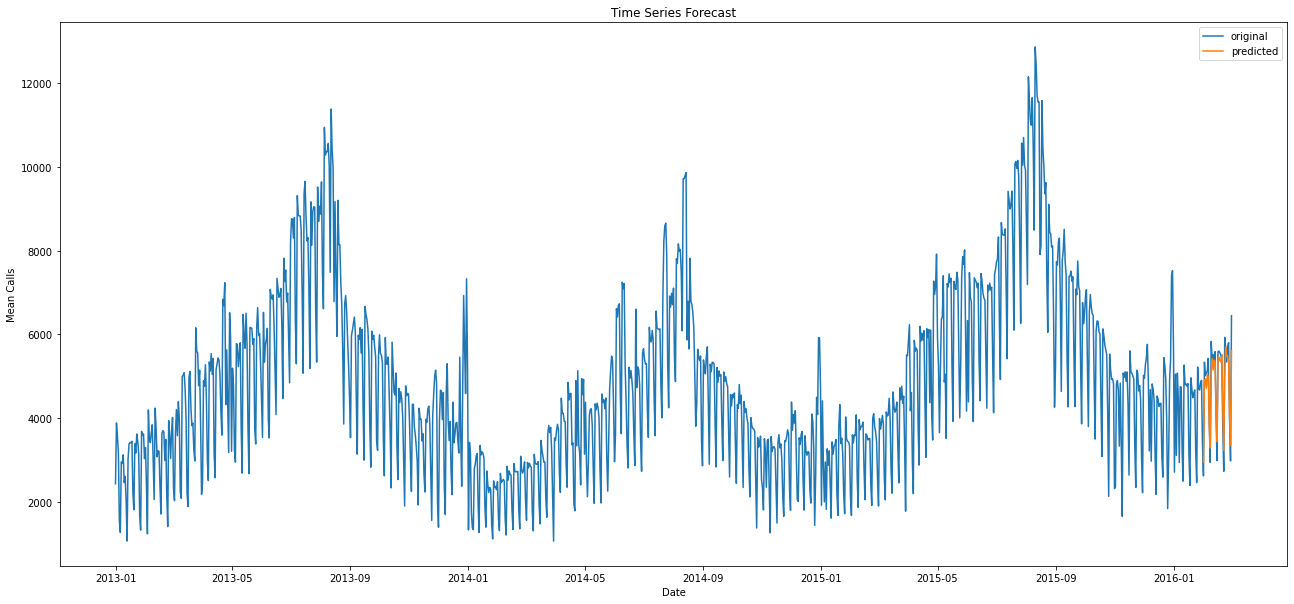

                              ARMA Model Results                              
Dep. Variable:                  calls   No. Observations:                 1155
Model:                     ARMA(9, 2)   Log Likelihood               -9299.496
Method:                       css-mle   S.D. of innovations            756.799
Date:                Mon, 13 Jun 2022   AIC                          18624.993
Time:                        06:27:10   BIC                          18690.667
Sample:                    01-01-2013   HQIC                         18649.778
                         - 02-29-2016                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4801.6928    734.313      6.539      0.000    3362.465    6240.921
ar.L1.calls     1.6032      0.063     25.335      0.000       1.479       1.727
ar.L2.calls    -0.9377      0.073    -12.878    

In [13]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(df, order=(9,0,2)) # (ARMA) = (p,d,q) d = 0 as no diff applied
model_fit = model.fit(disp=0)

# predict
start_index = datetime(2016, 1, 31)
end_index = datetime(2016, 2, 29)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(df.index,df.calls,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Calls")
plt.legend()
plt.show()
print(model_fit.summary())

In [26]:
#Slice the last month
train = df.calls[:1125]
test = df.calls[1125:]


In [15]:
#Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import explained_variance_score, r2_score

print(f'MSE is {mean_squared_error(test, forecast)}')
print(f'RMSE is {np.sqrt(mean_squared_error(test, forecast))}')
print(f'MAE is {mean_absolute_error(test, forecast)}')

print(f'Overall accuracy is {explained_variance_score(test, forecast)*100}%')#similar to r2
print(f'Overall accuracy is {r2_score(test, forecast)*100}%')# R2


MSE is 143001.13677463197
RMSE is 378.1549110809378
MAE is 300.7544394849416
Overall accuracy is 88.57451662885455%
Overall accuracy is 87.83798445283523%


#Erlang-C Method

In [18]:
pip install pyworkforce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Erlang-C should be used when failure to get a free resource results in the customer being added into a queue. The customers stay in the queue until a free resource can be found.

In [19]:
#Predicted calls for next 30days
forecast
a = forecast.to_list()
a = list(map(int, a))


**Transactions**: Number of incoming requests

**Resource**: The element that handles a transaction

**Arrival rate**: The number of incoming transactions in a time interval

**Average speed of answer (ASA)**: Average time that a transaction waits in the queue to be attended by a resource

**Average handle time (AHT)**: Average time that takes to a single resource to attend a transaction

**Shrinkage**: Expected percentage of time that a server is not available, for example, due to breaks, scheduled training, etc.

**Occupancy**: Percentage of time that a resource is handling a transaction

**Service level**: Percentage of transactions that arrives at a resource before a target ASA

In [20]:
from pyworkforce.queuing import MultiErlangC
param_grid = {"transactions": a, "aht": [3], "interval": [10*60], "asa": [20 / 60], "shrinkage": [0.3]}  
#aht = 3 mins, interval = (10hr*60mins) /days, asa = 20sec, shrinkage = 30%

multi_erlang = MultiErlangC(param_grid=param_grid, n_jobs=-1)
required_positions_scenarios = {"service_level": [0.8], "max_occupancy": [0.8]}
positions_requirements = multi_erlang.required_positions(required_positions_scenarios)

print("positions_requirements: ", positions_requirements)

positions_requirements:  [{'raw_positions': 19, 'positions': 28, 'service_level': 0.8679009815502914, 'occupancy': 0.7739473684210525, 'waiting_probability': 0.21288966001009885}, {'raw_positions': 31, 'positions': 45, 'service_level': 0.932818422667498, 'occupancy': 0.7859677419354838, 'waiting_probability': 0.14041766255153318}, {'raw_positions': 31, 'positions': 45, 'service_level': 0.9217849623303894, 'occupancy': 0.7956451612903226, 'waiting_probability': 0.15811945877043118}, {'raw_positions': 30, 'positions': 43, 'service_level': 0.9292096715692716, 'occupancy': 0.7851666666666667, 'waiting_probability': 0.14486952335534542}, {'raw_positions': 32, 'positions': 46, 'service_level': 0.9347574678552651, 'occupancy': 0.788125, 'waiting_probability': 0.1385796046176738}, {'raw_positions': 32, 'positions': 46, 'service_level': 0.9470434770770138, 'occupancy': 0.7754687499999999, 'waiting_probability': 0.11766064461301322}, {'raw_positions': 24, 'positions': 35, 'service_level': 0.8743

**raw_positions**: Number of positions found assuming shrinkage = 0

**positions**: Number of positions found taking the shrinkage provided by the user

**service_level**: The expected percentage of transactions that don't wait in the queue longer than the target ASA

**occupancy**: The expected occupancy that the system is going to have

**waiting_probability**: The probability that a transaction waits in queue

In [21]:
#{'raw_positions': 19, 'positions': 28, 'service_level': 0.8679009815502914, 'occupancy': 0.7739473684210525, 'waiting_probability': 0.21288966001009885}, 
#{'raw_positions': 31, 'positions': 45, 'service_level': 0.932818422667498, 'occupancy': 0.7859677419354838, 'waiting_probability': 0.14041766255153318}


Example
***  
*   19 - 28 operators should be ready online for 2016-01-31 
*   31 - 45 operators should be ready online for 2016-02-01  



#Forecast operator capacity for next week

In [22]:
df.tail()

,calls
date,
2016-02-25,5690
2016-02-26,5799
2016-02-27,3949
2016-02-28,2973
2016-02-29,6444


In [23]:
# multi-step out-of-sample forecast

start_index = len(df)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)
forecast

2016-03-01    6029.330873
2016-03-02    5491.409185
2016-03-03    5770.351981
2016-03-04    5694.357894
2016-03-05    4061.716375
2016-03-06    3398.389724
2016-03-07    6006.880542
Freq: D, dtype: float64

In [24]:
a = forecast.to_list()
a = list(map(int, a))
from pyworkforce.queuing import MultiErlangC
param_grid = {"transactions": a, "aht": [3], "interval": [10*60], "asa": [20 / 60], "shrinkage": [0.3]}  
#aht = 3 mins, interval = (10hr*60mins) /days, asa = 20sec, shrinkage = 30%

multi_erlang = MultiErlangC(param_grid=param_grid, n_jobs=-1)
required_positions_scenarios = {"service_level": [0.8], "max_occupancy": [0.8]}
positions_requirements = multi_erlang.required_positions(required_positions_scenarios)

print("positions_requirements: ", positions_requirements)

positions_requirements:  [{'raw_positions': 38, 'positions': 55, 'service_level': 0.9506284601132141, 'occupancy': 0.7932894736842107, 'waiting_probability': 0.1181732679952054}, {'raw_positions': 35, 'positions': 50, 'service_level': 0.9493550463023026, 'occupancy': 0.7844285714285715, 'waiting_probability': 0.11711694063207706}, {'raw_positions': 37, 'positions': 53, 'service_level': 0.9591210858079555, 'occupancy': 0.7797297297297298, 'waiting_probability': 0.10110604739767767}, {'raw_positions': 36, 'positions': 52, 'service_level': 0.9467223048315032, 'occupancy': 0.7908333333333333, 'waiting_probability': 0.12300000956216278}, {'raw_positions': 26, 'positions': 38, 'service_level': 0.9130329267176441, 'occupancy': 0.7809615384615385, 'waiting_probability': 0.16374451156222025}, {'raw_positions': 22, 'positions': 32, 'service_level': 0.8967551520711015, 'occupancy': 0.7722727272727272, 'waiting_probability': 0.1801464260531116}, {'raw_positions': 38, 'positions': 55, 'service_leve

In [25]:
#{'raw_positions': 38, 'positions': 55, 'service_level': 0.9506284601132141, 'occupancy': 0.7932894736842107, 'waiting_probability': 0.1181732679952054}
#{'raw_positions': 35, 'positions': 50, 'service_level': 0.9493550463023026, 'occupancy': 0.7844285714285715, 'waiting_probability': 0.11711694063207706}

Example
***  
*   38 - 55 operators should be ready online for 2016-03-01 
*   35 - 50 operators should be ready online for 2016-03-02 